In [1]:
import pandas as pd

#load dataset
df = pd.read_csv('titanic.csv')

In [ ]:
#show first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Variable Name and Type
PassengerID: Categorical
Survived: Categorical
Pclass: Categorical
Name: Categorical
Sex: Categorical
Age: Continuous
SibSp: Continuous
Parch: Continuous
Ticket: Categorical
Fare: Continuous
Cabin: Categorical
Embarked: Categorical

In [ ]:
#list number of unique values
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


The dataset consist of 12 columns (variables) and 891 rows (instances). Each row is an instance or representation of a passenger that was onboard the Titanic ship. For each passenger there are 12 characteristics or variables that they hold, these include: 'PassengerID' which is their personal identification number, 'Survived' which shows whether or not they survived the Titanic sinking, 'Name' which is their name, 'Sex' which is their sex, 'Age' which is their age, 'SibSp' which is the number of siblings or spouses they have, 'Parch' which is the number of parents/children that are aboard, 'Ticket' which is their ticket number, 'Fare' which is the fare they paid to board the ship, 'Cabin' which is their cabin number (this is missing many values), 'Embarked' which is where the passenger embarked at

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(style="whitegrid")

#list of continuous variables
continuous_vars = ['Age', 'Fare', 'SibSp', 'Parch']

#show descriptive statistics
df[continuous_vars].describe()

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


In [ ]:
#show median
df[continuous_vars].median()

,0
Age,28.0000
Fare,14.4542
SibSp,0.0000
Parch,0.0000


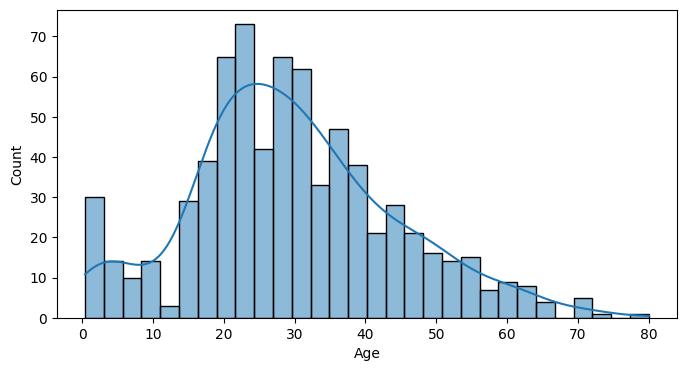

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.show()

Distribution:
This histogram has a bell-shaped curve and is somewhat normally distributed. However, there is a right-skew for older ages.

Central Tendency:
The mean age is about 29.70 years and the median age is about 28 years. The age distribution is almost symmetrical, but the mean is slightly higher than the median, which is why their is a slight-right skew in the histogram

Spread:
The standard deviation is about 14.53, therefore the ages vary widely around the mean. The minimum age is 0.42 years and the max age is 80 years.

Potential Issues:
The count is 714, meaning that there many missing values (891 - 714 = 177 missing values). There is also a right skew which may suggest that there are more younger passengers than older ones

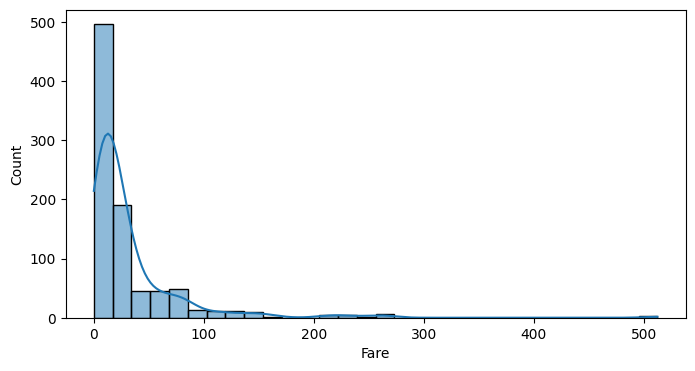

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Fare'].dropna(), kde=True, bins=30)
plt.show()

Distribution:
This histogram has a non-normal distribution and shows a heavy right-skewed distribution with most entries being in the low (< 100) fare costs meaning that a lot of passengers payed a low price for a ticket

Central Tendency:
The mean fare is 32.20 which is higher than the median. The median fare is 14.45 which is lower than the mean which could indicate most of the fares are low

Spread:
The standard deviation is about 49.69 which could show that there is a wide variance in fares. The minimum fare is 0 which means that there were free tickets some entries. The max fare is 512.33 which may indicate that their is an outlier or extreme values in the dataset

Potential Issues:
Most values are below 100 which could mean that fares over 100 are outliers. The right-heavy skew means that their are a lot of fares that are less than 100. There are no missing values but the fact that there are zero-value fares and non-zero value fares could mean that some sort of sale might have occurred

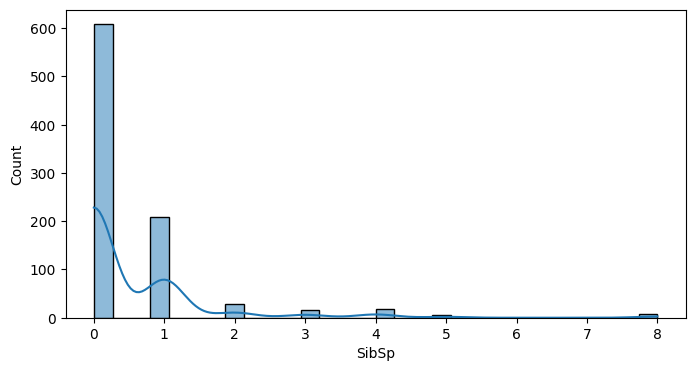

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['SibSp'].dropna(), kde=True, bins=30)
plt.show()

Distribution:
This is a non-normal distribution. The right-heavy skew shows that many passengers have few siblings

Central Tendency:
The mean is about 0.52 which could mean that mmost passengers traveled alone or with few people. The median is 0 which means that most passengers had no siblings or spouse

Spread:
The standard deviation is 1.10 which is a moderate spread. The maximum value is 8 which shows that at least 1 person traveled with many siblings or spouses

Potential Issues:
The very right-heavy skew means that most passengers traveled with a small number of spouses or siblings. Since most passengers traveled at most 1 sibling or spouse, passengers who traveled with more are somewhat of an outlier

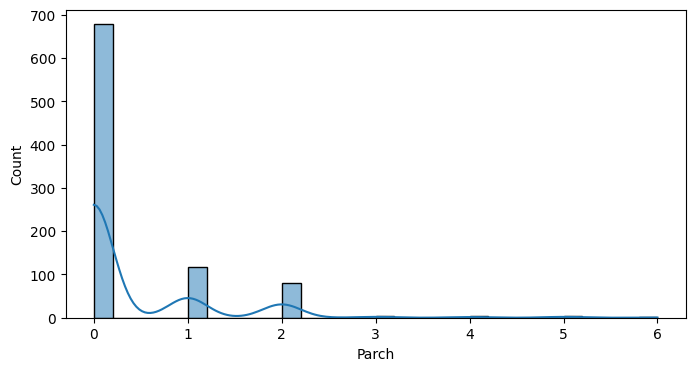

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Parch'].dropna(), kde=True, bins=30)
plt.show()

Distribution:
This histogram has a non-normal distribution and has a heavy right-skewed distribution meaning that most passengers traveled with few or no children

Central Tendency:
The mean is about 0.38 meaning that there was a low average of parents or children per passenger. The median is 0 which shows that most passengers were not parents or did not travel with children

Spread:
The standard deviation is about 0.81 which is somewhat large even though the mean is low. The maximum value is 6 meaning there was an extreme instance where a passenger traveled with 6 children

Potential Issues:
Values that were higher than 3 are outlier or rare instances. There are no missing values but most entries are zero which could be an issue in modeling the data. The distribution is heavily right-skewed meaing most people were not parents or traveled with a small number of children

In [ ]:
#list of categorical variables (MAYBE REMOVE NAME AND PASSENGERID)
categorical_vars = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Survived
0    549
1    342
Name: count, dtype: int64


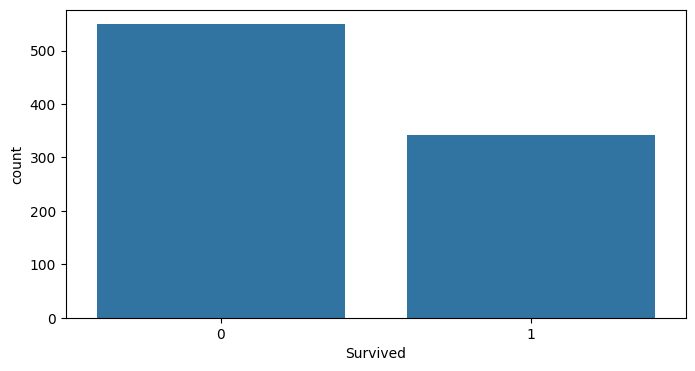

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Survived'], order=df['Survived'].value_counts().index)
#frequency counts of unique values
print(df['Survived'].value_counts(dropna=False))
plt.show()

Distribution:
The bar chart clearly shows that most passengers did not survive

Potential Issues:
The fact that there is an imbalance in survival rates could lead to a bias in models

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


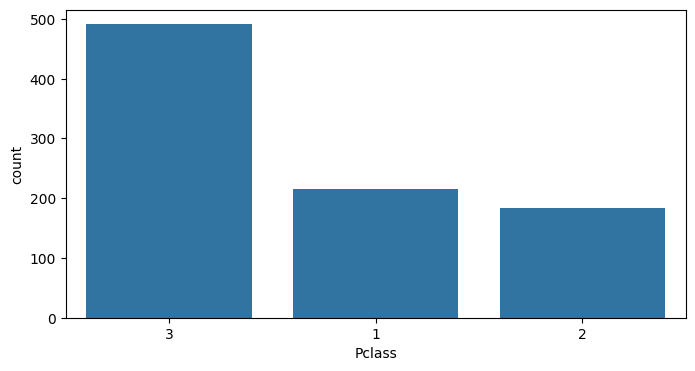

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Pclass'], order=df['Pclass'].value_counts().index)
#frequency counts of unique values
print(df['Pclass'].value_counts(dropna=False))
plt.show()

Distribution:
The chart shows that most people were in third class, followed by first class, then second class. This could mean that most passengers were of lower socio-economic standing. It could also indicate that the ship wanted to promote towards this class of passenger

Potential Issues:
There were no missing values or apparent issues with the data or visualization

Sex
male      577
female    314
Name: count, dtype: int64


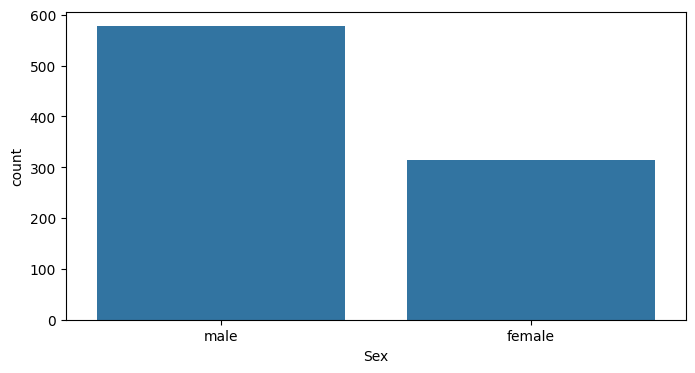

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Sex'], order=df['Sex'].value_counts().index)
#frequency counts of unique values
print(df['Sex'].value_counts(dropna=False))
plt.show()

Distribution:
There are more male than female passengers in the dataset by a significant amount. This could reflect some gender disparity which may be a reflection of the time period

Potential Issues:
The data imbalance could cause issues with modeling

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


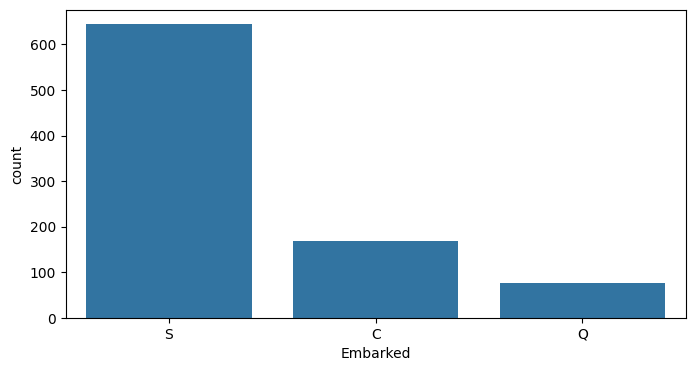

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Embarked'], order=df['Embarked'].value_counts().index)
#frequency counts of unique values
print(df['Embarked'].value_counts(dropna=False))
plt.show()

Distribution:
The chart shows that most passengers embarked from location 'S', followed by 'C' then 'Q'. The highest count being 'S' could indicate that this is the starting or origin location of the ship. The 'C' and 'Q' locations were most likely stop locations

Potential Issues:
There are two NaN values in the dataset meaning that the embarking location of two passengers was not recorded

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


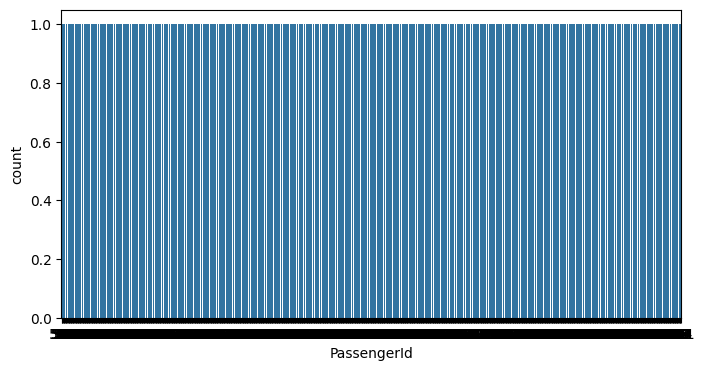

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


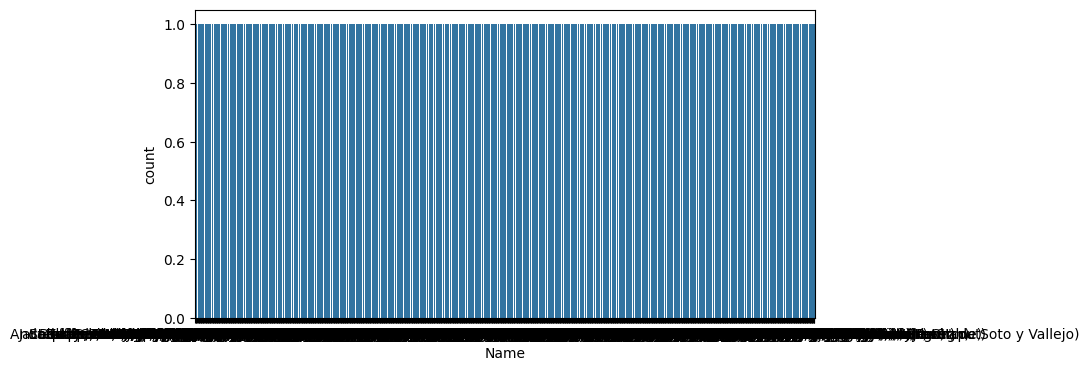

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


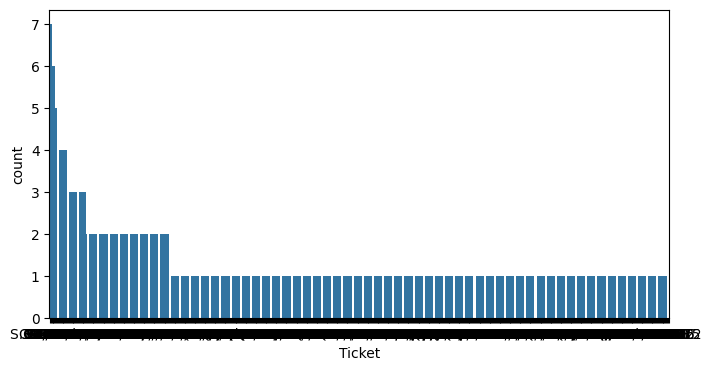

Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64


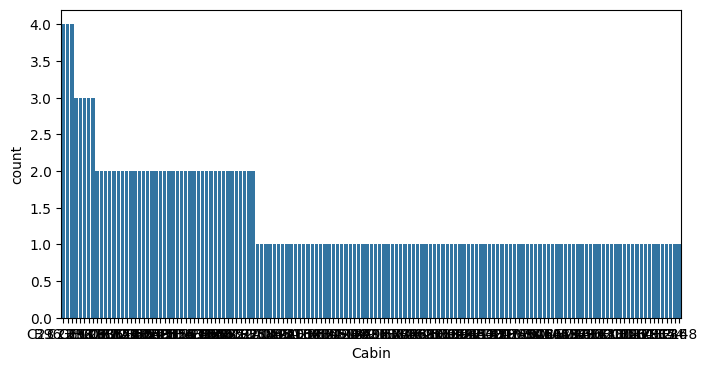

In [4]:
non_informative_vars = ['PassengerId', 'Name', 'Ticket', 'Cabin']
for var in non_informative_vars:
    print(df[var].value_counts(dropna=False))
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[var], order=df[var].value_counts().index)
    plt.show()

The categorical variables 'PassengerID', 'Name', 'Ticket', and 'Cabin' are not meaningful variables to analyse because they have many constant values with few variance. There are also several missing (NaN) values in both 'Ticket' and 'Cabin' datasets. This could potentially indicate that people may have unoffically boarded the ship

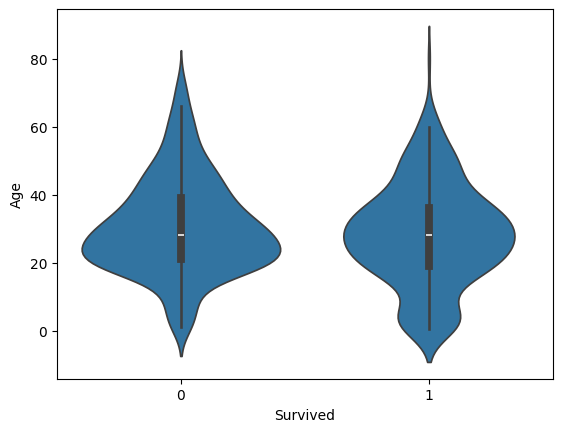

,mean,median
Survived,,
0,30.626179,28.0
1,28.343690,28.0


In [8]:
sns.violinplot(x='Survived', y='Age', data=df)
plt.show()
df.groupby('Survived')['Age'].agg(['mean', 'median'])

The data seems to show that younger passengers (around the age of 30) had a higher rate of survival. This could be a reflection in the priority being taken for who would be allowed onto the lifeboats first

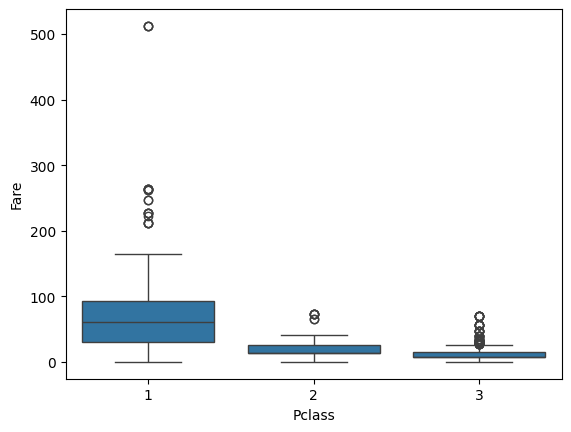

,mean,median,std
Pclass,,,
1,84.154687,60.2875,78.380373
2,20.662183,14.2500,13.417399
3,13.675550,8.0500,11.778142


In [9]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.show()
df.groupby('Pclass')['Fare'].agg(['mean', 'median', 'std'])

The box plot shows that passengers in 1st class payed higher fare prices than passengers in other classes. However, the extreme outliers in fare prices could be causing issues with the distribution and what the boxplot is visualizing

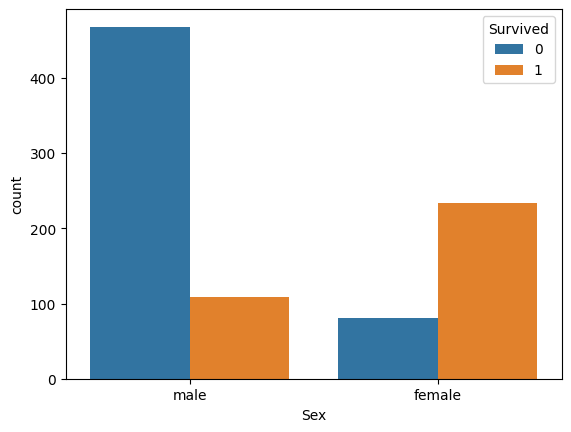

,Survived
Sex,
female,0.742038
male,0.188908


In [10]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()
df.pivot_table('Survived', index='Sex', aggfunc='mean')

The bar plot shows that, despite there being significantly more male passengers onboard the ship, a much higher number of females survived than males. Also more males did not survive than males. This relationship could indicate that their could have been a policy that more women were allowed take the lifeboats

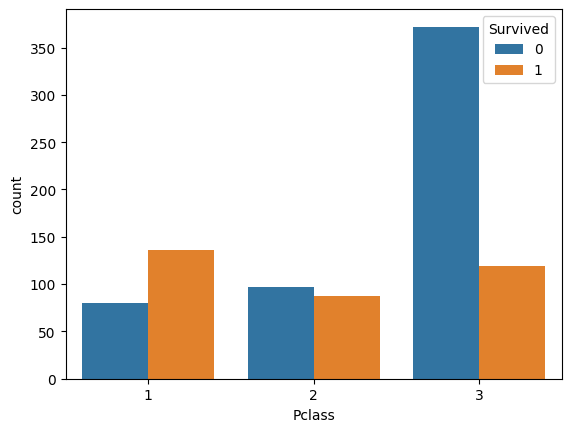

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()
df.pivot_table('Survived', index='Pclass', aggfunc='mean')

The bar plot seems to show that more passengers in 1st class survived than the other classes. However, it is surprising to see that more passengers in 3rd class survived than in 2nd class. The fact that most passengers who survived were in 1st class shows the socio-economic disparity on survival rates during the time of the ship sinking